In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [3]:
heart_disease = pd.read_csv('heart-disease.csv')

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"],columns=housing['feature_names'])
housing_df['target'] = housing['target']

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 4. Evaluating a machine learning model

Three ways to evaluate Skikit-Learn models/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the score method

In [4]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
model = RandomForestClassifier(n_estimators=1000)

# Fit the classifier to training data
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [5]:
# The Highest value fot the .score() method is 1.0, the Lowest is 0.0
model.score(X_train,y_train)

1.0

In [6]:
model.score(X_test,y_test)

0.8688524590163934

Let's use the `score()` on our regression problem...

In [7]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create X & y
X = housing_df.drop('target',axis=1)
y = housing_df['target']

# Split Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create Regressor Model
model = RandomForestRegressor(n_estimators=200)

# Fit the regressor to training data
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [8]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, Lowest = 0.0
model.score(X_test,y_test)

0.8066650267043768

In [9]:
model.score(X_test,y_test)

0.8066650267043768

# 4.2 Evaluation a model using `scoring` parameter

In [10]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Create train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
model = RandomForestClassifier(n_estimators=100)

# Fit the classifier to training data
model.fit(X_train,y_train);

In [11]:
model.score(X_test,y_test)

0.8524590163934426

In [12]:
cross_val_score(model,X,y ,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [13]:
cross_val_score(model,X,y ,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [14]:
np.random.seed(42)

# Single training and test split score
clf_single_score = model.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(model,X,y,cv=5))

# Compare the two

clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [16]:
# Default scoring parameter of classifier = mean accuracy
model.score(X_test,y_test)

0.8524590163934426

In [17]:
# Scoring parameter set to None by default
cross_val_score(model,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [19]:
np.mean(cross_val_score)

0.8248087431693989

In [20]:
print(f"heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score)*100:.2f}% ")

heart Disease Classifier Cross-validated Accuracy: 82.48% 


**Area under the reciever operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC Curve

ROC curves are a comparision of a model's true positive rate (TPR) versus a model's false positive rate (FPR)

* True Positive = Model predicts 1 when truth is 1
* False Positive = Model predicts 1 when truth is 0
* True Negetive = model predicts 0 when truth is 0
* false Negetive = model predicts 0 when truth is 1

In [21]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.metrics import roc_curve

# Fit the Classifier
clf.fit(X_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [23]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [24]:
# calculate fpr, tpr and thresholds

fpr, tpr, threshold = roc_curve(y_test,y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

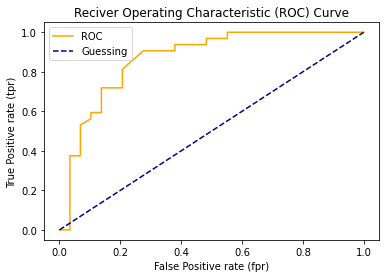

In [25]:
# Create a fucntion for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    '''
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model
    '''
    
    # Plot roc curve
    plt.plot(fpr,tpr,color='orange', label='ROC')
    # Plor line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    
    # Customize the plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title('Reciver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [26]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

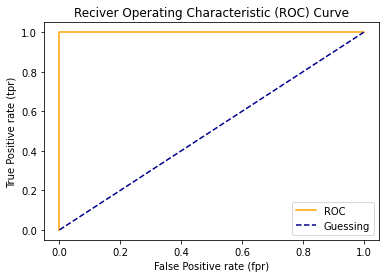

In [27]:
# Plot perfect ROC curve abd AUC curve score
fpr,tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [28]:
# perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

in essence, giving you an idea of where the model is getting confused

In [29]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [37]:
# Visulaize confusion matric with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [31]:
23 + 6 + 26 + 6

61

In [32]:
len(X_test)

61

In [33]:
# How to install a conda package into the current enviorment from a jupyter notebook

# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

<AxesSubplot:>

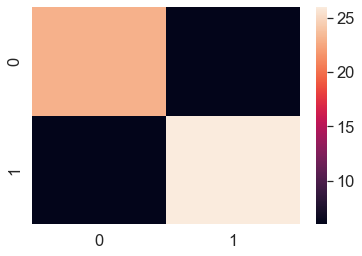

In [34]:
# Make our confustion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the dont scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using Seaborn
sns.heatmap(conf_mat)

**Confustion Matrix**

The next way to evaluate a classification model is by using a confustion matrix

A confustion matrix is aquick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, this will gives you an idea of where model is getting confused.

In [36]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [38]:
# Visulaize confusion matric with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


### Creating a confustion matrix using Scikit-Learn

To use the new methods of creating a confustion matrix with Scikit-Learn you need sklearn version 1+

In [41]:
import sklearn
sklearn.__version__

'1.0.2'

In [42]:
clf

RandomForestClassifier()

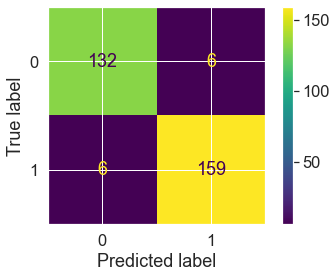

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

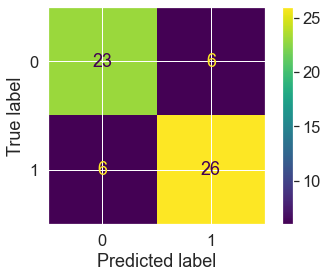

In [47]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

## Classification Report

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [52]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only onw poaitive case
disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

C:\Users\Ovesh-pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ovesh-pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ovesh-pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification matrics:

* <b>Accuracy</b> is a good measure to start with if all classes are balanced (e.g same amount of samples which are labelled with 0 or 1).
* <b>Precision</b> and <b>recall</b> become moew important when classes are imbalanced.
* If false positive prediction are worse than false negetive, aim for higher precision.
* If false negetive predictions are worse than false positive. aim for higher recall.
* F1-Score is a combination of precision and recall.


### 4.2.2 Regression model evaluation metrics

The ones we're going to cover are:
1. R^2 (Pronounced r-squared) or co-efficient of determination.
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

<b>R^2</b>

What R_squared does: Compares your models prediction to the mean of the targets. Values can be range from negetive infinity(a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model prefectly predicts a range of number it's R^2 value would be 1

In [54]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
               
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [55]:
model.score(X_test, y_test)

0.8065734772187598

In [56]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
y_test.mean()

2.0550030959302275

In [61]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [63]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [64]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [65]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

*** Mean absolute Error (MAE) ***

MAE is the average of absolute difference between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [66]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [70]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [73]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073803

** Mean Squared Error **

MSE is the mean of the square of the errors between actual and predicted values.

In [75]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [77]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [78]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.25346785208245565

In [84]:
df_large_error = df.copy()
df_large_error.iloc[0]['squared_differences'] = 16

In [85]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [86]:
# Calculate MSE with large error
df_large_error['squared_differences'].mean()

0.2573437523766417

In [88]:
df_large_error.iloc[1:100] = 20
df_large_error['squared_differences'].mean()

0.733418071208813

### 4.2.3 Finally using the `scoring` parameter

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [92]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None) # if scoring = None, estimator's default scoring evaluation metrics is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [103]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [106]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [107]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [108]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [110]:
# Cross-validated precision
print(f"The cross-validated accuracy is: {np.mean(cv_precision)}")

The cross-validated accuracy is: 0.8329547346025924


In [112]:
# Recall 
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [113]:
# Cross-validated recall
print(f"The cross-validated accuracy is: {np.mean(cv_recall)}")

The cross-validated accuracy is: 0.8545454545454545


In [116]:
# F1-score 
np.random.seed(42)
cv_f1 = cross_val_score(clf,X,y,cv=5, scoring='f1')
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [117]:
# Cross-validated recall
print(f"The cross-validated accuracy is: {np.mean(cv_f1)}")

The cross-validated accuracy is: 0.8426854603423346


Let's see the `scoring` parameter being using a regression problem...

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [119]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [120]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [128]:
# Mean absolute error
np.random.seed(42)
cv_mse = cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.4301865790173885

In [129]:
cv_mse

array([-0.51906271, -0.34789469, -0.37117373, -0.4500546 , -0.46274716])

In [130]:
# Mean squared error
np.random.seed(42)
cv_mae = cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.46620501732073655

In [131]:
cv_mae

array([-0.54256026, -0.40902123, -0.43706982, -0.46918522, -0.47318856])

## 4.3 Using different evaluation metrics as Scikit-Learn Functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` functions

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train,y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluation model using evaluation functions
print("Classification metrics on the test set ")
print(f"Accuracy : {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision : {precision_score(y_test,y_preds)}")
print(f"Recall : {recall_score(y_test,y_preds)}")
print(f"F1_Score : {f1_score(y_test,y_preds)}")

Classification metrics on the test set 
Accuracy : 85.25%
Precision : 0.8484848484848485
Recall : 0.875
F1_Score : 0.8615384615384615


In [142]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluation model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 Score : {r2_score(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"MSE : {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 Score : 0.8065734772187598
MAE : 0.32659871732073664
MSE : 0.2534678520824551


## 5. Improving a model 

First predictions = baseline predictions.
First model = baseline model.

from a data prespective:
* Could we collect more data ? (genrally, the more data, the better)
* Could we improve our data? 

From a model prespective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters

* Parameters = model finds these patters in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustivly with GridSearchCV

In [143]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [144]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning Hyperparameters by hand

Let's make 3 sets, Training, validation and test

In [145]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `n_estimators`

In [170]:
def evaluate_preds(y_true, y_preds):
    """
    Performs Evaluation comparision on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "f1":round(f1,2)
    }
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1:{f1:.2f}")
    
    return metric_dict

In [171]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid) , len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)

Acc:82.22%
Precision:0.81
Recall:0.88
F1:0.85


In [175]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc:82.22%
Precision:0.84
Recall:0.84
F1:0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [198]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators":[10,100,200,500,1000,1200],
    "max_depth":[None,5,10,20,30],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]
}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid,
    n_iter=10, # Number of models to try
    cv=5,
    verbose=2
)

# Fit the RandomizedSearcCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [185]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [186]:
# Make prediction with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc:81.97%
Precision:0.77
Recall:0.86
F1:0.81


### 5.3 Hyperparameter tuning with GridSearchSV

In [187]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [190]:
grid_2 = {
    "n_estimators": [100, 200, 500],
    'max_depth': [None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [6],
    'min_samples_leaf': [1, 2]
}

In [197]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(
    estimator=clf,
    param_grid=grid_2,
    cv=5,
    verbose=2
)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [201]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [203]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the prediction
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1:0.78


Let's compare our different models metrics.

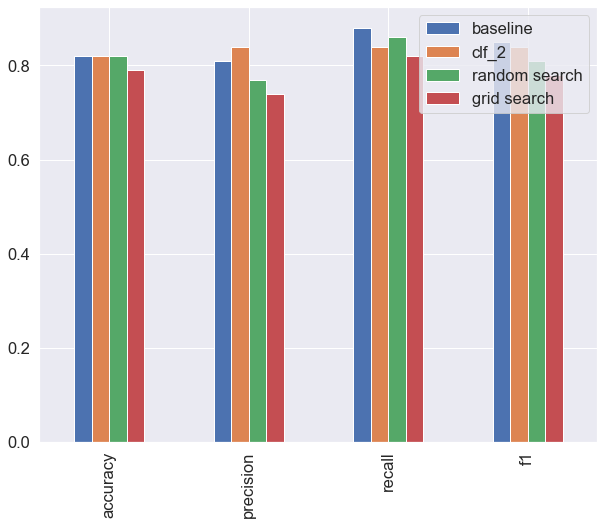

In [212]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2":clf_2_metrics,
                              "random search":rs_metrics,
                              "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. WIth the `joblib` module

<b>Pickle<b>

In [213]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open("gs_random_forst_model_1.pkl","wb"))

In [214]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forst_model_1.pkl","rb"))

In [215]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

<b>joblib<b>

In [217]:
from joblib import dump,load

# Save model to file
dump(gs_clf,filename="gs_random_forst_model_1.joblib")

['gs_random_forst_model_1.joblib']

In [222]:
# Import a saved joblin model
loaded_joblib_model = load(filename="gs_random_forst_model_1.joblib")

In [224]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc:78.69%
Precision:0.74
Recall:0.82
F1:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}